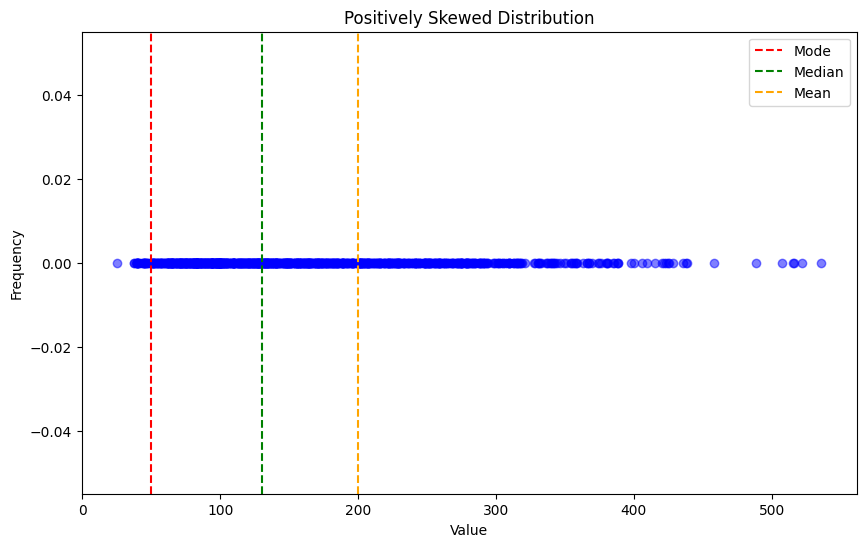

In [159]:
import numpy as np
from scipy.stats import skewnorm

import matplotlib.pyplot as plt

# Parameters for the skewed distribution
mode = 50
median = 130
mean = 200

size = 1000

# Calculate the shape parameter (a) for the skewnorm distribution
# We use the fact that for a positively skewed distribution, the mean > median > mode
a = 10  # Positive value for positive skew

# Generate the skewed distribution
SqrMtr = skewnorm.rvs(a, loc=mode, scale=(mean - mode), size=size)
SqrMtr = np.clip(SqrMtr, 25, 650)  # Ensure points are within limits

# Plot the distribution as points
plt.figure(figsize=(10, 6))
plt.plot(SqrMtr, np.zeros_like(SqrMtr), 'o', color='blue', alpha=0.5)  # Plot points instead of histogram
plt.axvline(x=mode, color='red', linestyle='--', label='Mode')
plt.axvline(x=median, color='green', linestyle='--', label='Median')
plt.axvline(x=mean, color='orange', linestyle='--', label='Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Positively Skewed Distribution')
plt.legend()
plt.show()

In [160]:
import numpy as np

mean = 10000
variance = 1000000  # Increased variance to spread the points more

cost = np.random.normal(loc=mean, scale=np.sqrt(variance), size=size)
cost = np.clip(cost, 5000, 25000)  # Ensure points are within the range [5000, 25000]
cost = cost.astype(int)  # Convert to integers

calculated_mean = np.mean(cost)
print(f"The mean is: {calculated_mean}")
#print(cost)


The mean is: 10010.437


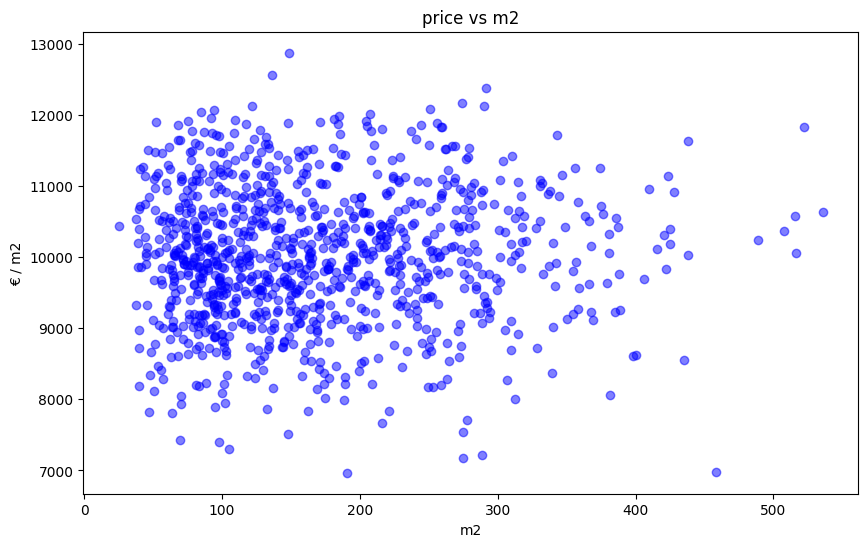

In [161]:
plt.figure(figsize=(10, 6))
plt.plot(SqrMtr, cost, 'o', color='blue', alpha=0.5)
plt.xlabel('m2')
plt.ylabel('€ / m2')
plt.title('price vs m2')
plt.show()

In [162]:
# Check the type of the variables
print(f"Type of cost: {type(cost)}")
print(f"Type of SqrMtr: {type(SqrMtr)}")

Type of cost: <class 'numpy.ndarray'>
Type of SqrMtr: <class 'numpy.ndarray'>


In [163]:
# Calculate total price
total_price = np.multiply(cost, SqrMtr).astype(int)
total_price = np.abs(total_price)  # Take the absolute value to revert negative values
print(f"Total price = {total_price}")

Total price = [1649111 2174520 2272115  628336  950684  453888 3394075 1133081  892964
 1094961 1264444 3448733  782865  919801 2203556  534387 1379740 2527471
  904245  955131  857938 2035758  734572 2966734 5194101 1971527  632874
 2236816 1788725 3196714  937889  519595 2204543 1784428  886059 1611590
 1911342 1073536  896360 2634762 1773354 1045282 1169074 1459376  822474
  886573 1322463 1301694 2188762 2193515  789773  801774  423723  518137
 1812638 1507734 1212566 1911959  851817 3544997  962632 1541681  540992
 1408624 1485766 1524618 1053411 2030472 1516503 5006263  881366 1435143
 2143004 1254653 2520418 1281378 1458374  601978 1757925 3934829 1860190
  659465  817020 1088307  772044 1671025 2049942 2527728  576614 2490772
  996909  610296 2153267  811625  841014 2071627 1955932 2426891 1427057
 1124573 2434252 2717113 1553392  544406 2551022 2746534  739590  357904
 3476701 1520031  666210 1378166 2883444  934630  866572 1475211  623013
 1422412 1772500  583877 1496462 2640

Mean total price = 1697579
Maximum price = 6176617
Minimum price = 260775
Standard deviation of total price = 948505


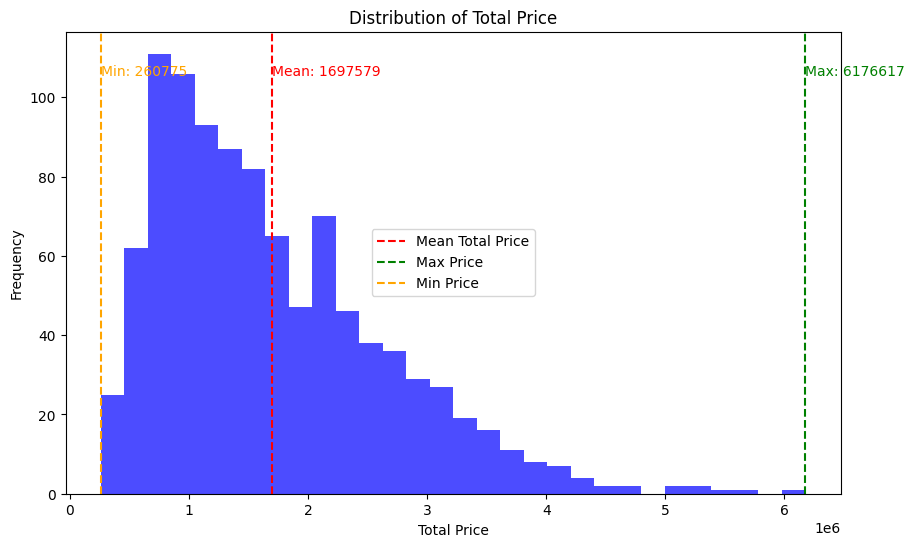

Total price data saved to 'total_price_data.csv'


In [164]:

mean_total_price = np.mean(total_price).astype(int)
print(f"Mean total price = {mean_total_price}")

max_price = np.max(total_price).astype(int)
print(f"Maximum price = {max_price}")

min_price = np.min(total_price).astype(int)
print(f"Minimum price = {min_price}")

std_dev_price = np.std(total_price).astype(int)
print(f"Standard deviation of total price = {std_dev_price}")

# Adding annotations for clarity on the histogram

plt.figure(figsize=(10, 6))
plt.hist(total_price, bins=30, color='blue', alpha=0.7)
plt.axvline(x=mean_total_price, color='red', linestyle='--', label='Mean Total Price')
plt.axvline(x=max_price, color='green', linestyle='--', label='Max Price')
plt.axvline(x=min_price, color='orange', linestyle='--', label='Min Price')

# Adding text annotations for the mean, max, and min prices
plt.text(mean_total_price, plt.ylim()[1]*0.9, f'Mean: {mean_total_price}', color='red', verticalalignment='bottom')
plt.text(max_price, plt.ylim()[1]*0.9, f'Max: {max_price}', color='green', verticalalignment='bottom')
plt.text(min_price, plt.ylim()[1]*0.9, f'Min: {min_price}', color='orange', verticalalignment='bottom')

plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')
plt.legend()
plt.show()

# Saving the total price data to a file for future reference
np.savetxt('total_price_data.csv', total_price, delimiter=',', header='Total Price', comments='')
print("Total price data saved to 'total_price_data.csv'")

In [165]:
min_sqr_mtr = np.min(SqrMtr).astype(int)
max_sqr_mtr = np.max(SqrMtr).astype(int)
print(f"Range of SqrMtr: Min = {min_sqr_mtr}, Max = {max_sqr_mtr}")

min_cost = np.min(cost).astype(int)
max_cost = np.max(cost).astype(int)
print(f"Range of cost: Min = {min_cost}, Max = {max_cost}")

Range of SqrMtr: Min = 25, Max = 536
Range of cost: Min = 6968, Max = 12873


In [166]:
import pandas as pd

# Create a DataFrame with the two variables
data = pd.DataFrame({'SqrMtr': SqrMtr.astype(int), 'Price': total_price})

# Save the DataFrame to a CSV file
data.to_csv('data.csv', index=False)
print("Data saved to 'data.csv'")

Data saved to 'data.csv'
